In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 10s - loss: 0.2477 - accuracy: 0.9255 - val_loss: 0.1104 - val_accuracy: 0.9665 - 10s/epoch - 22ms/step
Epoch 2/20
469/469 - 13s - loss: 0.1012 - accuracy: 0.9695 - val_loss: 0.0840 - val_accuracy: 0.9743 - 13s/epoch - 28ms/step
Epoch 3/20
469/469 - 8s - loss: 0.0727 - accuracy: 0.9770 - val_loss: 0.0741 - val_accuracy: 0.9767 - 8s/epoch - 16ms/step
Epoch 4/20
469/469 - 7s - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0822 - val_accuracy: 0.9750 - 7s/epoch - 16ms/step
Epoch 5/20
469/469 - 7s - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.0789 - val_accuracy: 0.9775 - 7s/epoch - 15ms/step
Epoch 6/20
469/469 - 8s - loss: 0.0396 - accuracy: 0.9868 - val_loss: 0.0686 - val_accuracy: 0.9794 - 8s/epoch - 16ms/step
Epoch 7/20
469/469 - 7s - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0711 - val_accuracy: 0.9800 - 7s/epoch - 16ms/step
Epoch 8/20
469/469 - 7s - loss: 0.0281 - accuracy: 0.9904 - val_loss: 0.0656 - val_accuracy: 0.9816 - 7s/epoch - 15ms/step
Epoch 9/20
4

In [ ]:
history.history

{'loss': [0.24767357110977173,
  0.10116829723119736,
  0.07266171276569366,
  0.055463239550590515,
  0.046619877219200134,
  0.03961757570505142,
  0.034902382642030716,
  0.028110342100262642,
  0.02616359107196331,
  0.026391195133328438,
  0.022804247215390205,
  0.022861214354634285,
  0.01921638660132885,
  0.019159788265824318,
  0.020306752994656563,
  0.015421883203089237,
  0.015452152118086815,
  0.01722538098692894,
  0.014976977370679379,
  0.017397306859493256],
 'accuracy': [0.9254833459854126,
  0.9695000052452087,
  0.9769999980926514,
  0.9825999736785889,
  0.9850333333015442,
  0.9868166446685791,
  0.9889500141143799,
  0.9904166460037231,
  0.991016685962677,
  0.9912333488464355,
  0.9922166466712952,
  0.9921333193778992,
  0.9933000206947327,
  0.9932666420936584,
  0.9937333464622498,
  0.9947999715805054,
  0.9948333501815796,
  0.9942166805267334,
  0.9949166774749756,
  0.9943666458129883],
 'val_loss': [0.11038917303085327,
  0.08398347347974777,
  0.0741

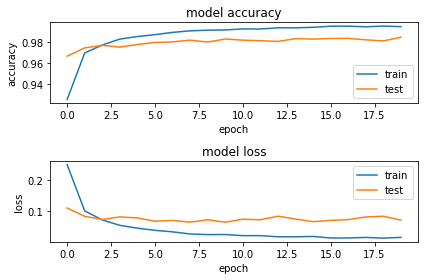

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
